<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%ED%95%A9%EB%B6%88%EC%9E%90%EB%A3%8C%EC%A0%95%EB%A6%ACD_%EC%88%98%EC%8B%9C%EC%A0%84%ED%98%95%EB%B3%84%ED%95%A9%EA%B2%A9%EB%A5%A0_%EC%9D%80%ED%8F%89%EA%B3%A02024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 실행 후 런타임 재실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 라이브러리 부르기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')


# 첫 5줄을 봅니다.
df.head(4)

In [3]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

시작등급을 입력하세요: 1
끝 등급을 입력하세요: 9
구간 크기를 입력하세요: 1


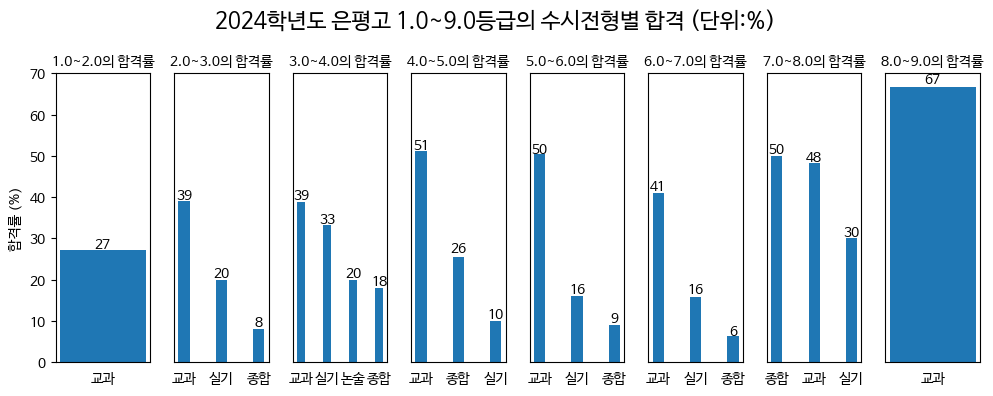

In [40]:
#수시 전형별 합격률

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')

# 최저 등급과 최고 등급을 입력받기
min_grade = float(input("시작등급을 입력하세요: "))
max_grade = float(input("끝 등급을 입력하세요: "))

# 구간 크기 입력받기
interval_size = float(input("구간 크기를 입력하세요: "))

# 최저 등급부터 최고 등급까지 구간별로 반복
fig, axes = plt.subplots(1, int((max_grade - min_grade) / interval_size), figsize=(10, 4), sharey=True)  # 서브플롯 생성
for i, grade in enumerate(np.arange(min_grade, max_grade, interval_size)):
    mx = grade + interval_size
    mi = grade

    # mx이상 mi이하 조건을 충족하는 객체 만들기
    df_interval = df[(df.전과목 >= mi) & (df.전과목 < mx) & ~(df.전형분류 == '수능')].copy()

    # '전형분류'별 지원 건수 계산
    grouped = df_interval.groupby('전형분류').size().reset_index(name='지원건수')

    # '전형분류'별 합격 건수 계산
    grouped_pass = df_interval[df_interval['최종'] == '합'].groupby('전형분류').size().reset_index(name='합격건수')

    # 합치기
    grouped = pd.merge(grouped, grouped_pass, on='전형분류')

    # 합격률 계산
    grouped['합격률'] = (grouped['합격건수'] / grouped['지원건수'] * 100).round(2)

    # 그래프를 grouped['합격률'] 값의 내림차순으로 배치
    grouped = grouped.sort_values(by='합격률', ascending=False)

    # Plotting
    ax = axes[i]
    bars = ax.bar(grouped['전형분류'], grouped['합격률'], width=0.3)
    if i == 0:
        ax.set_ylabel('합격률 (%)')  # y 레이블은 첫 번째 서브플롯에만 표시
    ax.set_title(f'{mi}~{mx}의 합격률', fontsize=10)
    ax.set_xticks(np.arange(len(grouped['전형분류']))) # x축 틱 위치 설정
    ax.set_xticklabels(grouped['전형분류'])  # x축 레이블 회전


    # x축 tick 삭제
    ax.tick_params(axis='x',          # 적용할 축
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=True)  # labels along the bottom edge are on


    # y축 tick 삭제
    if i != 0:
        ax.tick_params(axis='y',          # 적용할 축
                    which='both',      # both major and minor ticks are affected
                    left=False,      # ticks along the bottom edge are off
                    right=False,         # ticks along the top edge are off
                    labelleft=False)  # labels along the bottom edge are on

    # 각 막대 위에 값을 표시
    for bar in bars:
        yval = round(bar.get_height())  # 반올림
        ax.text(bar.get_x() + bar.get_width()/2, yval-0.3, yval, ha='center', va='bottom')

# 그래프 제목 추가
plt.suptitle(f'2024학년도 은평고 {min_grade}~{max_grade}등급의 수시전형별 합격 (단위:%)', fontsize=16)

plt.tight_layout()
plt.show()